# Đồ án cuối kì Lập Trình Cho Khoa Học Dữ Liệu 

## Danh sách các thành viên
| Họ và tên | MSSV | Link github |
| --- | --- | --- |
| Vương Thành An | 19127326 | https://github.com/vuongthanhan-19127326 |
| Trần Minh Thiện | 19127281 | https://github.com/MinhThien285 |
| Lê Tâm Anh | 19127330 | https://github.com/letamanh-19127330 |

## Link github của đồ án:
https://github.com/vuongthanhan-19127326/dackltkhdl

## Mục lục
- Hướng dẫn chạy Project
- Thu thập dữ liệu
  + Dữ liệu của bạn làm về chủ đề gì ? Bạn lấy được nguồn của dữ liệu từ đâu?
  + Tác giả có cho phép bạn được sử dụng dữ liệu của họ không ?
  + Làm thế nào để tác giả thu thập được những dữ liệu này?
- Khám phá dữ liệu
  + Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
  + Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
  + Dữ liệu có các dòng bị lặp không?
  + Mỗi cột có ý nghĩa gì?
  + Dữ liệu có bị thiếu hay không?
  + Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?
  + Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?
  + Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?
- Đặt ra các câu hỏi có ý nghĩa? Giải thích về lợi ích của việc trả lời các câu hỏi này.

- Tiền xử lí và phân tích câu hỏi
  + Phân tích câu hỏi bằng code 
  - Kết quả nhận được từ cho câu hỏi 
- Nhìn lại
- Nguồn tham khảo

## Hướng dẫn chạy project:

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import warnings
import calendar
import seaborn as sn
warnings.filterwarnings("ignore")
%matplotlib inline

## Thu thập dữ liệu

### Dữ liệu của bạn làm về chủ đề gì ? Bạn lấy được nguồn của dữ liệu từ đâu?
   - Dữ liệu thu thập được là về các vụ tai nạn tại Mỹ. Dữ liệu đượ

### Tác giả có cho phép bạn được sử dụng dữ liệu của họ không ?
   - Theo như điều khoản của chủ sở hữu thì data được chia sẻ rộng rãi và mục đích học tập, nghiên cứu không vi phạm điều khoản cảu chủ sỡ hữu đưa ra

### Làm thế nào để tác giả thu thập được những dữ liệu này?
   - Trích lời tác giả về cách thu thập dữ liệu: Đây là tập dữ liệu về tai nạn xe hơi trên toàn quốc, bao gồm 49 tiểu bang của Hoa Kỳ . Dữ liệu tai nạn được thu thập từ tháng 2 năm 2016 đến tháng 12 năm 2020 , sử dụng nhiều API cung cấp dữ liệu sự cố (hoặc sự kiện) giao thông trực tuyến. Các API này truyền phát dữ liệu giao thông được thu thập bởi nhiều thực thể, chẳng hạn như bộ giao thông vận tải Hoa Kỳ và tiểu bang, cơ quan thực thi pháp luật, camera giao thông và cảm biến giao thông trong mạng lưới đường bộ. Hiện tại, có khoảng 1,5 triệu hồ sơ tai nạn trong bộ dữ liệu này

In [2]:
np.set_printoptions(suppress=True)

In [3]:
accidents_df = pd.read_csv('US_Accidents_Dec20_updated.csv',error_bad_lines=False)
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? 

In [4]:
num_rows,num_cols=accidents_df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 1516064 dòng và 47 cột


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng thể hiện các thông tin về các vụ tai nạn xe hơi thuộc 49 tiểu bang của Hoa Kỳ. Có vẻ không có dòng nào khác loài.

## Dữ liệu có các dòng bị lặp không? 

In [5]:
have_duplicated_rows=accidents_df.duplicated().any()
print(have_duplicated_rows)

False


## Mỗi cột có ý nghĩa gì?

•  ID: Số nhận dạng (duy nhất) của các hồ sơ vụ tai nạn.

•  Severity: Mức độ nghiêm trọng của vụ tai nạn tác động đến giao thông, được tính theo 4 mức từ 1 đến 4 (1 là tác động ít nhất đến giao thông gây ra thời gian trễ ngắn, 4 là tác động nhiều nhất đến giao thông gây ra thời gian trễ dài).

•  Start_Time: Thời gian xảy ra vụ tai nạn (tính theo múi giờ địa phương)

•  End_Time: Thời gian vụ tai nạn kết thúc (kết thúc ở đây có nghĩa là vụ tai nạn không còn làm ảnh hưởng đến giao thông)

•  Start_Lat: Vĩ độ vụ tai nạn trong định vị GPS của điểm bắt đầu.

•  Start_Lng: Kinh độ vụ tai nạn trong định vị GPS của điểm bắt đầu.

•  End_Lat: Vĩ độ vụ tai nạn trong định vị GPS của điểm kết thúc.

•  End_Lng: Kinh độ vụ tai nạn trong định vị GPS của điểm kết thúc.

•  Distance(mi): Chiều dài của đoạn đường bị ảnh hưởng bởi vụ tai tạn.

•  Description: Mô tả vụ tai nạn.

•  Number: Số của con đường trong bản định danh.

•  Street: Tên của con đường trong bản đinh danh.

•  Side: Vụ tai nạn xảy ra ở phía (phải/trái) của con đường.

•  City: Tên thành phố xảy ra vụ tai nạn.

•  County: Tên quận xảy ra vụ tai nạn.

•  State: Trạng thái trong bản ghi địa chỉ.

•  Zipcode: Mã zip trong bản ghi địa chỉ.

•  Country: Tên quốc gia có vụ tai nạn.

•  Timezone: Múi giờ của nơi xảy ra vụ tại nạn.

•  Airport_Code: Mã của trạm thời tiết tại sân bay gần nhất với vị trí xảy ra tai nạn.

•  Weather_Timestamp: Dấu thời gian của bản ghi thời tiết theo múi giờ địa phương.

•  Temperature (F): Nhiệt độ lúc xảy ra tai nạn.

•  Wind_Chill (F): Gió lạnh lúc xảy ra tai nạn.

•  Humidity (%): Độ ẩm lúc xảy ra tai nạn.

•  Pressure (inches): Áp suất không khí lúc xảy ra tai nạn.

•  Visibility (miles): Tầm nhìn lúc xảy ra tai nạn.

•  Wind_Direction: Hướng gió lúc xảy ra tai nạn.

•  Wind_Speed (mph): Tốc độ gió lúc xảy ra tai nạn(miles/hour).

•  Precipitation (inches): Lượng mưa lúc xảy ra tai nạn.

•  Weather_Condition: Trạng thái thời tiết lúc xảy ra tai nạn (mưa, bão, tuyết rơi,…)

•  Amenity: Sự tiện nghi của một khu vực ở gần vụ tai nạn.

•  Bump: Có biển báo của gờ giảm tốc hoặc các gờ ở gần vị trí xảy ra vụ tai nạn hay không.

•  Crossing: Có biển báo người qua đường của các đường ở gần vụ tai nạn hay không.

•  Give_Way: Có biển báo nhường đường ở vị trí gần vụ tai nạn hay không.

•  Junction: Có biển báo đường giao nhau ở vị trí gần vụ tai nạn hay không.

•  No_Exit: Có biển báo cấm đi vào ở gần vụ tai nạn hay không.

•  Railway: Có biển báo đường sắt ở gần vụ tai nạn hay không.

•  Roundabout: Có sự hiện diện của bùng binh ở gần vị trí vụ tai nạn hay không.

•  Station: Có sự hiện diện của trạm ở gần vị trí vụ tai nạn hay không.

•  Stop: Có biển báo dừng ở gần vị trí vụ tai nạn hay không.

•  Traffic_Calming: Có sự hiện diện của các thiết kế vật lý trên đường nhằm hạn chế tốc độ ở gần vị trí vụ tai nạn hay không.

•  Traffic_Signal: Có sự hiện diện của đèn giao thông ở gần vị trí vụ tai nạn hay không.

•  Turning_Loop: Có sự hiện diện của khúc quoanh ở gần vị trí vụ tai nạn hay không.

•  Sunrise_Sunset: Hiển thị khoảng thời gian dựa theo mặt trời mọc hay lặn.

•  Civil_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn dân sự.

•  Nautical_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn hàng hải.

•  Astronomical_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn thiên văn.

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
col_dtypes=accidents_df.dtypes
print(col_dtypes)

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [7]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [8]:
objects_key=(accidents_df.loc[:, accidents_df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(accidents_df[key]))

numer of object columns: 20
types of  ID  is  {<class 'str'>}
types of  Start_Time  is  {<class 'str'>}
types of  End_Time  is  {<class 'str'>}
types of  Description  is  {<class 'str'>}
types of  Street  is  {<class 'str'>}
types of  Side  is  {<class 'str'>}
types of  City  is  {<class 'str'>, <class 'float'>}
types of  County  is  {<class 'str'>}
types of  State  is  {<class 'str'>}
types of  Zipcode  is  {<class 'str'>, <class 'float'>}
types of  Country  is  {<class 'str'>}
types of  Timezone  is  {<class 'str'>, <class 'float'>}
types of  Airport_Code  is  {<class 'str'>, <class 'float'>}
types of  Weather_Timestamp  is  {<class 'str'>, <class 'float'>}
types of  Wind_Direction  is  {<class 'str'>, <class 'float'>}
types of  Weather_Condition  is  {<class 'str'>, <class 'float'>}
types of  Sunrise_Sunset  is  {<class 'str'>, <class 'float'>}
types of  Civil_Twilight  is  {<class 'str'>, <class 'float'>}
types of  Nautical_Twilight  is  {<class 'str'>, <class 'float'>}
types of  A

## Tiền xử lí

### Chuyển dtype của cột "Date" sang datetime

In [9]:
datetime_cols=['Start_Time','End_Time','Weather_Timestamp']
for key in datetime_cols:
    accidents_df[key]= pd.to_datetime(accidents_df[key])

## Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [10]:
numeric_cols=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)']

all_num_cols=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)','Start_Time','End_Time','Weather_Timestamp']

nume_col_profiles_df=pd.DataFrame(index=['missing_ratio','min','max'],
                                  columns=all_num_cols)

nume_col_profiles_df.loc['missing_ratio',numeric_cols]=np.float64(accidents_df[numeric_cols].isna().mean()*100)

nume_col_profiles_df.loc['min',numeric_cols]=np.float64(accidents_df[numeric_cols].min())

nume_col_profiles_df.loc['max',numeric_cols]=np.float64(accidents_df[numeric_cols].max())

nume_col_profiles_df=nume_col_profiles_df.astype(np.float64)




nume_col_profiles_df.loc['missing_ratio',datetime_cols]=accidents_df[datetime_cols].isna().mean()*100

nume_col_profiles_df.loc['min',datetime_cols]=accidents_df[datetime_cols].min()

nume_col_profiles_df.loc['max',datetime_cols]=accidents_df[datetime_cols].max()

print(nume_col_profiles_df)


               Start_Lat   Start_Lng   End_Lat     End_Lng  Distance(mi)  \
missing_ratio   0.000000    0.000000   0.00000    0.000000         0.000   
min            24.570222 -124.497567  24.57011 -124.497829         0.000   
max            49.000580  -67.113167  49.07500  -67.109242       155.186   

                     Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
missing_ratio  6.900072e+01        2.838469      29.637007     3.001786   
min            0.000000e+00      -89.000000     -89.000000     1.000000   
max            9.999997e+06      170.600000     113.000000   100.000000   

               Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
missing_ratio      2.392643         2.91617         8.499773   
min                0.000000         0.00000         0.000000   
max               58.040000       140.00000       984.000000   

               Precipitation(in)           Start_Time             End_Time  \
missing_ratio          33.675953                  0.0      

## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào ?

In [11]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()

def diff_vals(s):
    return s.dropna().unique()


In [46]:
cate_cols=list(set(accidents_df.keys())-set(all_num_cols))

index=['missing_ratio', 'num_diff_vals', 'diff_vals']
cate_col_profiles_df=pd.DataFrame(
     index=index,
     columns=cate_cols)
accidents_cate_col_df = accidents_df[cate_cols]
cate_col_profiles_df = accidents_cate_col_df.agg([missing_ratio,num_diff_vals,diff_vals])


print(cate_col_profiles_df)

                     Station                            year  \
missing_ratio            0.0                             0.0   
num_diff_vals              2                               5   
diff_vals      [False, True]  [2016, 2017, 2020, 2019, 2018]   

              Nautical_Twilight  \
missing_ratio          0.005475   
num_diff_vals                 2   
diff_vals          [Night, Day]   

                                                     Description Country  \
missing_ratio                                                0.0     0.0   
num_diff_vals                                             527655       1   
diff_vals      [Between Sawmill Rd/Exit 20 and OH-315/Olentan...    [US]   

                                                           State  \
missing_ratio                                                0.0   
num_diff_vals                                                 49   
diff_vals      [OH, IN, KY, WV, MI, PA, CA, NV, MN, TX, MO, C...   

                        

# Đặt ra các câu hỏi có ý nghĩa? Giải thích về lợi ích của việc trả lời các câu hỏi này.

- Câu 1: Liệu thời điểm ra đường có phải là ảnh hưởng gì đến việc xảy ra tai nạn giao thông ? Chúng ta cần có phải chọn thời điểm để ra ngoài cho an toàn không ? 
  + Cho chúng ta thấy được đâu là thời điểm an toàn trong 1 tuần khi ra đường để lựa chọn đảm bảo tính mạng cho bản thân và gia đình
  + Biết được đâu là thời điểm nguy hiểm an toàn trong 1 tuần để hạn chế ra đường
  + Phần nào hiểu được sự biến động về số lượng tai nạn giao thông xảy ra ở các thời điểm trong tuần
  + Là phần mở đầu cho phần lý giải những nguyên nhân gây ra tai nạn giao thông ở những câu hỏi bên dưới

- Câu 2: Ánh sáng có tác động đến tầm nhìn đối với các công trình giao thông ở các quận xảy ra nhiều tai nạn hay không?
  + Sau khi trả lời câu hỏi này, ta sẽ biết được liệu ban ngày và ban đêm có ảnh hưởng lớn đến tầm nhìn của lái xe hay không và việc đặt các công trình giao thông trên đã nằm ở nơi dễ nhìn thấy hay chưa. Từ đó, đưa ra các biện pháp cải thiện tầm nhìn nhằm giảm thiểu số vụ tai nạn xảy ra do không có đủ tầm nhìn.
 
- Câu 3: Trong các năm từ 2018 đến 2020, những thành phố nào có nhiều vụ tai nạn xảy ra nhất ? Làm sao để có thể hạn chế tối đa số vụ tai nạn trong các thành phố này?
  + Trả lời được câu hỏi này, ta sẽ tìm ra giải pháp để giảm thiểu số vụ tai nạn xảy ra trong các thành phố nêu trên.



### Câu hỏi 1: Những thời điểm  nào trong ngày thì thường xảy ra tai nạn giao thông ? Liệu mức độ nghiêm trọng của những vụ tai nạn có bị ảnh hưởn ?

Lấy ra tổng số vụ tai nạn dựa trên mức độ nghiêm trọng của những vụ tai nạn đó và tính trung bình

   Severity  number_of_acc  percent_acc
0         1          28178     1.858629
1         2        1212382    79.969051
2         3         161052    10.623034
3         4         114452     7.549286


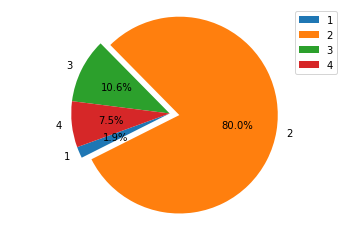

In [209]:
serverity_df=accidents_df.groupby(['Severity']).size().reset_index(name='number_of_acc')
serverity_df['percent_acc'] = (serverity_df['number_of_acc'] / serverity_df['number_of_acc'].sum()) * 100
print(serverity_df)
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(serverity_df['percent_acc'], explode=explode, labels=serverity_df['Severity'], autopct='%1.1f%%',
        shadow=False, startangle=200)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.legend()
plt.show()

Ta có thể tỉ lệ xảy ra những vụ tai nạn ở mức độ 2 là rất cao khoảng 80% và tỉ lệ xảy ra tai nạn thấp là những vụ tai nạn mức độ 4 khoảng 1.9%, đứng thứ 2 là những vụ tai nạn có mức độ nghiêm trọng là 3 khoảng 10.6% và đứng thứ 3 là những vụ tai có mức độ nghiêm trọng mức độ 4. Ta tiếp tục tìm hiểu xem tỉ lệ xảy ra các vụ tai nạn với mức độ nghiêm trọng có phân bố khác nhau hay giống nhau qua các thời điểm trong một ngày ? Từ đó rút ra kết luận về mức độ xảy ra các vụ tai nạn trong ngày ?

##### Tạo thêm các để tạo thêm các cột ngày, tháng, năm, giờ  bắt đầu xảy ra tai nạn từ cột Start_time
 - Dùng hàm dt của series để tạo thêm các cột ngày, tháng, năm, giờ, phút, ngày trong tuần, tên của ngày trong tuần bắt đầu xảy ra tai nạn từ cột Start_time vì ở đây mình phân tích về thời điểm xảy ra tai nạn giao thông nên nếu lấy các số liệu trên của cột End_Time thì có thể dữ liệu sẽ bị sai lệch khá nhiều do có những vụ tai nạn có khoảng thời gian từ lúc bắt đầu đến kết thúc là khá lâu  

In [185]:
accidents_df['day']=accidents_df['Start_Time'].dt.day
accidents_df['month']=accidents_df['Start_Time'].dt.month
accidents_df['year']=accidents_df['Start_Time'].dt.year
accidents_df['hour']=accidents_df['Start_Time'].dt.hour
accidents_df['minute']=accidents_df['Start_Time'].dt.minute
accidents_df['weekday']=accidents_df['Start_Time'].dt.weekday
accidents_df['name_of_day']=accidents_df['Start_Time'].dt.day_name()




print(accidents_df[['day','month','year','hour']])



         day  month  year  hour
0          8      2  2016     0
1          8      2  2016     5
2          8      2  2016     6
3          8      2  2016     6
4          8      2  2016     6
...      ...    ...   ...   ...
1516059   23      8  2019    18
1516060   23      8  2019    19
1516061   23      8  2019    19
1516062   23      8  2019    19
1516063   23      8  2019    18

[1516064 rows x 4 columns]


##### Tổng số tai nạn xảy ra tại các thời điểm ở mỗi ngày trong tuần
 - Tiến hành gom nhóm tạo thành một dataframe mới dựa trên thời điểm giờ trong ngày mà xảy ra vụ tai nạn đó và mức độ nghiêm trọng của vụ tai nạn đó

In [210]:
mean_hour=accidents_df.groupby(['Severity','hour']).size().reset_index(name='number_of_acc')

In [211]:
print(mean_hour)

    Severity  hour  number_of_acc
0          1     0            306
1          1     1            228
2          1     2            239
3          1     3            227
4          1     4            307
..       ...   ...            ...
91         4    19           4936
92         4    20           4410
93         4    21           3924
94         4    22           3845
95         4    23           3931

[96 rows x 3 columns]


##### Tính tỉ lệ số vụ tai nạn xảy ra theo mức độ nghiêm trọng qua các thời điểm trong ngày

In [212]:
#mean_hour['number_of_acc']=mean_hour['number_of_acc']/time_counts_df['counts']
mean_hour['percent_number_of_acc']=(mean_hour['number_of_acc'] / mean_hour['number_of_acc'].sum()) * 100
print(mean_hour)

    Severity  hour  number_of_acc  percent_number_of_acc
0          1     0            306               0.020184
1          1     1            228               0.015039
2          1     2            239               0.015765
3          1     3            227               0.014973
4          1     4            307               0.020250
..       ...   ...            ...                    ...
91         4    19           4936               0.325580
92         4    20           4410               0.290885
93         4    21           3924               0.258828
94         4    22           3845               0.253617
95         4    23           3931               0.259290

[96 rows x 4 columns]


##### Dùng hàm pivot của pandas để chuyển severity thành 4 cột và hour thành các dòng để vẽ biểu đồ line chart

In [213]:
test_hour=  mean_hour.pivot(index='hour', columns='Severity', values='percent_number_of_acc')
print(test_hour)

Severity         1         2         3         4
hour                                            
0         0.020184  2.520936  0.201641  0.299658
1         0.015039  2.511108  0.149202  0.189570
2         0.015765  2.194301  0.154017  0.195242
3         0.014973  1.722619  0.175454  0.209226
4         0.020250  1.527838  0.175784  0.220505
5         0.038983  2.018780  0.289566  0.298009
6         0.062464  2.981998  0.440021  0.331912
7         0.084693  3.864547  0.561124  0.366607
8         0.092872  3.969687  0.571216  0.366145
9         0.080340  3.051388  0.465482  0.343521
10        0.074865  2.544352  0.390089  0.317863
11        0.088914  2.637026  0.393189  0.303153
12        0.099204  3.859204  0.460733  0.348666
13        0.120707  4.548225  0.489623  0.362320
14        0.125918  4.856391  0.587244  0.377557
15        0.154545  5.228407  0.807090  0.410867
16        0.188910  5.415734  0.943562  0.414494
17        0.187657  5.556560  0.962756  0.417463
18        0.152896  

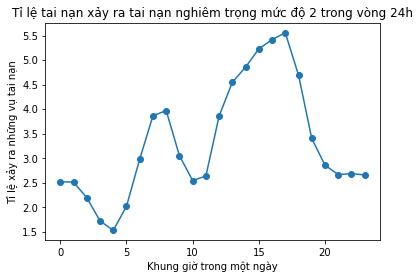

In [218]:
test_hour[2].plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 2 trong vòng 24h")
plt.show()

  -  Ta thấy tỉ lệ xảy ra những vụ tai nạn nghiêm trọng ở mức độ 2 có sự phân bố giảm mạnh từ 0h-4h (2.5%-1.5%) sau đó tăng lên từ 5h-8h(4%) rồi giảm từ 9h-11h(2.7%) sau đó tăng dần lên cao nhất ở lúc 17h(5.5%) từ đó giảm dần xuống thấp cho đến 23h(2.7%) rồi tiếp tục giảm cho đến ngày hôm sau

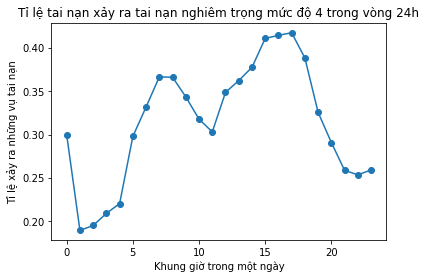

In [219]:
test_hour[4].plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 4 trong vòng 24h")
plt.show()

- Tỉ lệ tai nạn mức độ 4 xảy ra qua các khung giờ thì có sự tương đồng so với mức độ 2 về hình dáng biểu đồ cũng giảm xuống thấp từ 0h-4h sau đó tăng đến 8h rồi giảm đến 11h và tăng lên 17h xong rồi giảm xuống nhưng tỉ lệ xảy ra qua các thời điểm thấp hơn nhiều so với những vụ mức độ 2

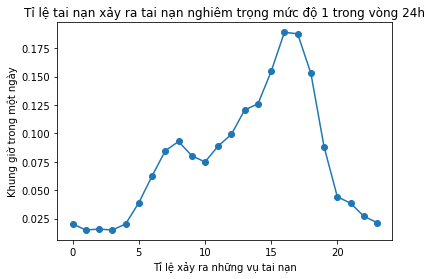

In [220]:
test_hour[1].plot(marker='o')
plt.xlabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.ylabel("Khung giờ trong một ngày")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 1 trong vòng 24h")
plt.show()

  - Số lượng tai nạn nghiêm trọng ở mức 1 có số lượng xảy ra vào ban đêm đã về một tỉ lệ khá thấp khi so với tỉ lệ cao nhất của nó từ 0h-3h số lượng tai nạn gần như không tăng và cũng không giảm đến 4h bắt đầu thì tăng dần lên đến 8h tuy nhiên khác với 2 biểu đồ trên thì ở biểu đồ mức độ 1 này chỉ giảm nhẹ từ 8h-10h rồi sau đó bắt đầu tăng lên cao nhất ở 16h-17h(0.075%->0.19%) và sau đó giảm cho đến cuối ngày

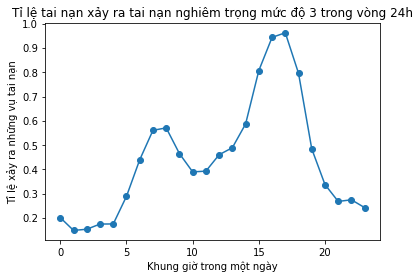

In [221]:
test_hour[3].plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 3 trong vòng 24h")
plt.show()

- Tai nạn nghiêm trọng ở mức 3 có số lượng xảy ra vào ban đêm về hình dáng khá tương tự như mức độ 1 từ (20-4h) số vụ tai nạn bắt đâu giảm dần còn số vụ tai nạn từ 9h-11h và lên cao nhất ở khoảng 16-17h tuy nhiên tỉ lệ tai nạn ở mức độ 3 cao hơn so mức độ 1

Để hiểu rõ hơn về sự chênh lệch về sự nghiêm trọng của các vụ tai nạn qua các khung giờ trong ngày thì ta sẽ vẽ cả 4 đường tương ứng với 4 mức độ nghiêm trọng lên 1 biểu đồ

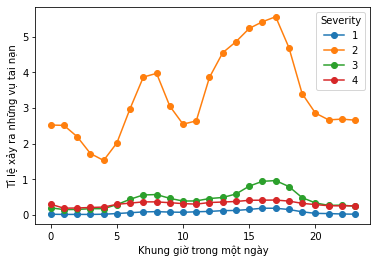

In [222]:
test_hour.plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.show()

Từ đây ta thấy tỉ lệ xảy ra những vụ tai nạn ở mức độ 2 có sự chênh lệch rất lớn ở khoảng 17h là cao nhất khoảng hơn 400% so với 3 mức độ nghiêm trọng còn lại.Tuy nhiên chính vì điều này làm ta chưa thấy rõ được sự phân bố của 3 mức độ tai nạn còn lại khi so sánh với nhau nên ta sẽ vẽ một biểu đồ nữa và bỏ mức độ 2 ra 

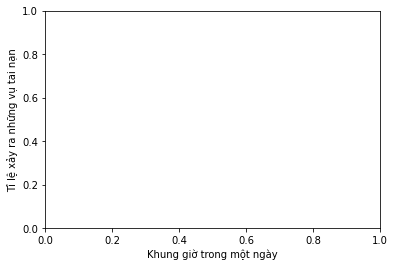

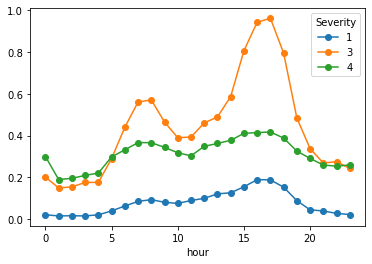

In [223]:
temp_df=test_hour.drop([2], axis=1)
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
temp_df.plot(marker='o')
plt.show()

Ta có thể thấy được hầu hết qua các khung giờ thì tỉ lệ xảy ra tai nạn mức độ 3 sẽ cao hơn so với mức độ 4 và mức độ 1 cao nhất 16-17h cao hơn mức độ 3 khoảng 150%. Tuy nhiên ở vào khoảng khung giờ từ 0h-4h thì ta thấy tỉ lệ tai nạn xảy ra của mức độ 4 cao hơn so với mức độ 3 đặc biệt ở lúc khoảng 0h cao hơn khoảng 50%. Điều có thể lý giải bằng việc vào ban đêm thì tầm nhìn hạn chế và mật độ xe trên đường sẽ giảm khi đó các tài xế thường chạy xe mà không quan tâm đến các tín hiệu giao thông, dẫn đến nếu có xảy ra tai nạn thì những vụ tai nạn thì tỉ lệ gây ra thương vong sẽ cao hơn so với những vụ tai nạn phải nhập viện chứ nhưng chưa đến mức chết.

Tổng kết lại thì ta có rút ra kết luận rằng:
  - Nếu một ai đó bị tai nạn giao thông thì khả năng người đó chỉ cần dùng một số thuốc hoặc băng bó vết thương nho nhỏ rồi sẽ khỏe hẳn là rất cao khoảng 80% và một khi xảy ra tai nạn giao thông thì cũng rất ít người chỉ bị xây xác nhẹ hoặc không bị gì(khoảng 2%). Còn lại là số vụ có người bị thường nặng phải nhập viện và số trường hợp tử vong lần lượt chiếm khoảng 10% và 7.5%
  - Sự phân bố tỉ lệ xảy ra những vụ tai nạn giao thông với 4 mức độ nghiêm trọng có sự tương đồng với nhau về các thời điểm xảy ra nhiều vụ tai nạn và thời điểm xảy ra ít vụ tai nạn.Cụ thể:
    + Những vụ tai nạn sẽ thường xảy ra nhiều nhất vào hai thời điểm rồi giảm dần tương ứng với 2 giá trị cực đại của mỗi biểu đồ. Đỉnh thứ nhất khoảng 7-8h đây là thời điểm mà mọi người đang trên đường đến nơi việc nên mật độ giao thông trên đường cao và mọi người muốn đến nơi làm việc nhanh vì sợ bị trễ nên dễ xảy ra tai nạn.Đỉnh thứ 2 là 16-17h lúc này mọi người vừa tan ca đang từ nơi làm việc trở về nhà dẫn đến số lượng xe đang chạy trên đường rất nhiều và mọi người cũng muốn về nhanh để được nghỉ ngơi giải tỏa căng thẳng nên thường xảy ra những sự cố đáng tiếc. 
    + Bên cạnh đó ta cũng thấy được những thời điểm mà những vụ tai nạn sẽ giảm xuống đó chỉnh là vào khoảng 10-11h đây là buổi trưa thì lúc này mọi người có xu hướng nghỉ trưa ăn uống tại chỗ làm ít đi lại nên ít xảy ra tai nạn và một thời điểm nữa đó là buổi tồi vào khoảng 2-4h vào thời điểm này tai nạn sẽ xảy ra ở mức thấp nhất trong ngày do lúc đó hầu hết mọi người đều đã đi ngủ ít người đi lại trên đường nên sẽ khó xảy ra tai nạn.
    + Tuy nhiên vẫn có thời điểm vào lúc khoảng 0h thì số lượng tai nạn với mức độ gây thương vong chết người sẽ xãy ra cao hơn số lượng những vụ tai nạn ở mức độ 3.
  - Từ đây ta sẽ đưa ra những giải pháp giúp giảm thiểu tai nạn vào những khung giờ nguy hiểm này:
      + Nếu là nhà nước thì cần 
        *  Bố trí các lực lượng chức năng hổ trợ điều phối giao thông trên các tuyến đường vào những thời điểm từ 7-8h và 16-17h giao thông trên đường được thông thoáng hơn ít tai nạn hơn, kèm theo để ý một tí những xe chạy ẩu vào khoảng 0h để tránh những tai nạn đáng tiếc
        * Xây dựng thêm những tuyến đường mới để các xe dễ lưu thông hơn
        * Mở thêm nhiều tuyến xe công cộng vận chuyển được nhiều người cùng lúc để giảm thiểu số lượng xe cộ trên đường lúc giờ cao điểm
      + Nếu là cá nhân thì nên :
         * Đừng quá vội vàng xếp hàng chờ đợi đến lượt cho dù có bị chậm trễ kế hoạch tính mạng của mình vẫn quan trọng hơn
         * Chọn một tuyến đường khác ít xe hơn để đi
         * Chạy xe đúng làn đường cho phép
         * Không chạy quá sát xe phía trước do mật độ lưu thông cao nên khi xe phía trước chạy chậm hoặc phanh lại sẽ rất dễ xảy ra va chạm

### Câu 2: Ánh sáng có tác động đến tầm nhìn đối với các công trình giao thông ở các quận xảy ra nhiều tai nạn hay không?

In [20]:
#Câu 2: Ánh sáng có ảnh hưởng đến việc nhìn thấy các biển báo ở các nơi xảy ra nhiều tai nạn hay không?

#Lọc ra các cột cần dùng
sign = ['County','Visibility(mi)','Sunrise_Sunset','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
        'Station','Stop','Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
df = accidents_df[sign]
df_county = accidents_df[['County','Bump']]

#Tìm top 5 quận  có số vụ tai nạn nhiều nhất 
data = pd.DataFrame(df_county.groupby(["County"]).count())
data.columns = ['Top county']
data = data.sort_values(['Top county'], ascending=False)
data = data.reset_index()
top5 = data['County'].loc[0:4]
top5 = list(top5)

#Lọc ra các vụ tai nạn có sự xuất hiện của các công trình giao thông như biển báo, bùng binh, đén giao thông,... tại 5 khu vực nóng
C_area = df[(df['Bump']==True) | (df['Crossing']==True) | (df['Give_Way']==True) | (df['Junction']==True) | (df['No_Exit']==True) | 
        (df['Railway']==True) | (df['Roundabout']==True) | (df['Station']==True) | (df['Stop']==True) | 
        (df['Traffic_Calming']==True) | (df['Traffic_Signal']==True) | (df['Turning_Loop']==True) ]
C_area = C_area.loc[C_area['County'].isin(top5)]
C_area = C_area.reset_index(drop = True)

#Đầu tiên hãy tìm hiểu về tỉ lệ các vụ tai nạn xảy ra vào ban ngày và ban đêm xem có điều gì bất thường không
Total = len(C_area['County'])
Area = C_area[['Sunrise_Sunset','County']]
Area = Area.groupby('Sunrise_Sunset').count()
Day = Area['County'][0]
Night = Area['County'][1]
#Tính tỉ lệ và lưu vào 2 biến Acc_At_Night, Acc_At_Day
Acc_Night = round((Night / Total),3)
Acc_Day = round((Day / Total),3)
print("Ti le tai nan vao ban dem: ", Acc_Night)
print("Ti le tai nan vao ban ngay: ", Acc_Day)

Ti le tai nan vao ban dem:  0.378
Ti le tai nan vao ban ngay:  0.622


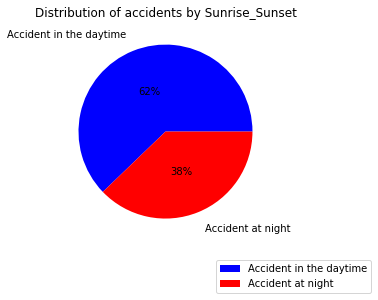

In [21]:
#Biểu đồ tỉ lệ tai nạn vào ban ngày và ban đêm
Arr = [Acc_Day, Acc_Night]
label = ["Accident in the daytime","Accident at night"]
mycolors = ["blue","red"]
plt.pie(Arr,labels = label, colors = mycolors ,autopct='%1.0f%%', pctdistance=0.5, labeldistance= 1.2)
plt.title("Distribution of accidents by Sunrise_Sunset")
plt.legend(bbox_to_anchor=(1,0), loc="right", bbox_transform=plt.gcf().transFigure)

## Nhận xét:
    + Tỉ lệ các vụ tai nạn xảy ra vào ban ngày cao hơn gần như là gấp đôi so với tỉ lệ các vụ tai nạn xảy ra vào ban đêm. Điều này không nói lên ánh sáng có ảnh hưởng hay không bởi ta đều biết ban ngày lưu lượng phương tiện nhiều hơn nên dễ xảy ra tai nạn hơn.
    + Vào ban ngày thì ánh sáng sẽ nhiều hơn và tầm nhìn sẽ tốt hơn ban đêm rất nhiều khi ban đêm ta phải phụ thuộc vào hệ thống đèn chiếu sáng của phương tiện cũng như là hệ thống đèn công cộng.
    + Để có thể phân tích về sự ảnh hường của ánh sáng, chúng ta sẽ cùng tìm hiểu về tầm nhìn của người gặp tai nạn trước khi vụ tai nạn xảy ra.

Text(0.5, 1.0, 'Visibility of accidents at Night')

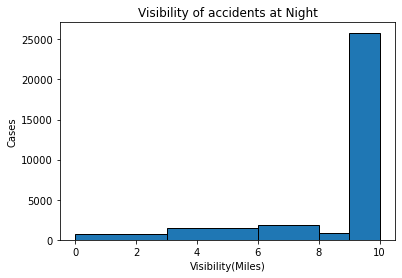

In [22]:
Visibility = C_area[['Sunrise_Sunset','Visibility(mi)']]
Night = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Night']
hist1 = plt.hist(Night['Visibility(mi)'], [0,3,6,8,9,10], edgecolor = 'black')
plt.xlabel("Visibility(Miles)")
plt.ylabel("Cases")
plt.title("Visibility of accidents at Night")

Text(0.5, 1.0, 'Visibility of accidents in the Daytime')

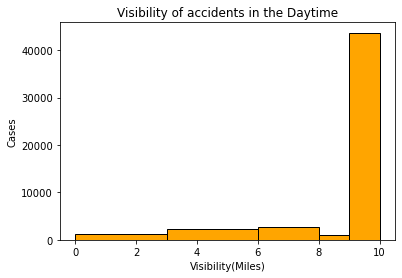

In [23]:
Day = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Day']
hist2 = plt.hist(Day['Visibility(mi)'], [0,3,6,8,9,10], color = "orange", edgecolor = 'black')
plt.xlabel("Visibility(Miles)")
plt.ylabel("Cases")
plt.title("Visibility of accidents in the Daytime")

## Nhận xét:
   - Như vậy nhận định về việc hệ thống chiếu sáng của phương tiện và công cộng Không làm ảnh hưởng nhiều lắm đến các vụ tai nạn như ta đã suy đoán.
   - Dựa vào biểu đồ ta có thể thấy tầm nhìn bất kể ban ngày hay ban đêm đều ở mức ở rất cao. Điều này nói lên hệ thống chiếu sáng vẫn hoạt động khá tốt và việc nhìn thấy các công trình giao thông có thể nói là ở mức khá tốt.
   - Một số vụ tai nạn xảy ra do tầm nhìn kém có thể là do:
            + Ở một số điểm hệ thống đèn gặp trục trặc bất ngờ nên không thể xử lý kịp.
            + Người lái xe ở trong tình trạng không tỉnh táo.
            + Thị lực có thể gặp vẫn đề như cận thị.
            + Thời tiết làm ảnh hưởng đến tầm nhìn.
   - Với mức tầm nhìn gần như là tốt nhất từ 9-10 thì các vụ tai nạn lại xảy ra nhiều nhất, điều này có thể là do:
            + Lỗi bất cẩn, mất tập trung khi lái xe.
            + Người lái xe sử dụng chất kích thích, không làm chủ được bản thân.
            + Thời tiết tác động đến khả năng làm chủ phương tiện.
            + Phương tiện hư hỏng bất ngờ.
            
      

### Câu 3:  Trong các năm từ 2018 đến 2020, những thành phố nào có nhiều vụ tai nạn xảy ra nhất ? Làm sao để có thể hạn chế tối đa số vụ tai nạn trong các thành phố này?

In [24]:
newest_year_data=accidents_df["year"]
third_years_newest=newest_year_data
after_equal_third_years=third_years_newest <=accidents_df['year']
top_county_each_year_df=accidents_df.loc[after_equal_third_years]
top_county_each_year_df=top_county_each_year_df.groupby(by=["City","year",]).count()
county_temp=top_county_each_year_df["ID"]
top_county_each_year_df=pd.Series(data=county_temp)
top_county_each_year_df=top_county_each_year_df.unstack(0)
sort_county=top_county_each_year_df.sum(axis = 0, skipna = True)
sort_county=sort_county.sort_values(ascending=False)
sort_county=pd.DataFrame(sort_county.iloc[0:3])
index=sort_county.index
a_list = list(index)

In [25]:
sort_county

,0
City,
Los Angeles,39984.0
Miami,36233.0
Charlotte,22203.0


<AxesSubplot:xlabel='year'>

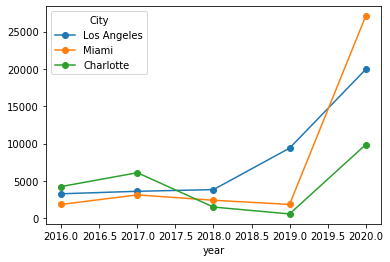

In [26]:
top_county_each_year_df[a_list].plot(marker='o')

### Nhận xét
- Nhìn vào biểu đồ ta có thể thấy tốc độ tăng trường về số ca tai nạn giao thông của 5 nước có tổng số tai nạn giao thông cao nhất qua 5 năm 2016-2020
- Ta có thể thấy ở đây trong 5 thành phố thì chỉ có Los Angeles là có số lượng tăng không giảm xuyên suốt từ năm 2016-2020
- Los Angeles tăng đều qua các năm từ 2016-2020 và có 20000 ca tai nạn giao thông gấp gần 2 lần so với 1 năm trước
- Nhìn qua thành phố đứng hạng 2 Miami thì ta thấy một điều đặc biệt ở đây đó là thành phố này có khoảng 2000 ca ở năm 2016 sau đó tăng lên 3000 ở năm 2017 và giảm xuống khoảng 2000 ca năm 2019 nhưng lại đột ngộ tăng mạnh ở năm 2020 tới khoảng 26000 tức gấp 13 lần so với 1 năm trước đây là một dấu hiệu đáng báo động
- Thành phố Charlotte cũng giảm mạnh ở hai năm 2018-2019 và bắt đầu tăng mạnh ở năm 2020 với khoảng 8000 ca gấp 8 lần so với năm 2019
- Tóm lại số ca tai nạn giao thông mỗi năm 2 thành phố top 2 và top 3 đều theo một xu hướng là tăng ở năm 2016-2017, giảm ở năm 2018-2019 và tăng mạnh ở năm 2020 ngoại trừ Los Angeles là tăng đều qua từng năm và tăng mạnh ở năm 2020
- Vậy làm sao để ta có thể hạn chế tai nạn giao thông ở những thành phố này ?
- Chúng ta cần phải biết được cụ thể tai nạn xảy ra ở những địa điểm nào trên thành phố cụ thể là những con đường trên thành phố đó.
- Để từ đó vạch ra những biện pháp hiệu quả để giải quyết vấn đề này 

In [27]:
top_county_each_year_df[a_list]

City,Los Angeles,Miami,Charlotte
year,,,
2016,3259.0,1834.0,4235.0
2017,3595.0,3113.0,6084.0
2018,3820.0,2392.0,1479.0
2019,9380.0,1832.0,561.0
2020,19930.0,27062.0,9844.0


In [28]:
country_df=accidents_df[accidents_df['City']==a_list[0]]
street_df=country_df.groupby(['City','County','Street']).size().reset_index(name='number_of_acc')

In [29]:
street_df=street_df.sort_values(by='number_of_acc', ascending=False).reset_index()
top_street=pd.DataFrame(street_df.loc[0:4])
print(top_street)

   index         City       County              Street  number_of_acc
0    855  Los Angeles  Los Angeles              I-10 E           2199
1    856  Los Angeles  Los Angeles              I-10 W           2183
2    842  Los Angeles  Los Angeles  Golden State Fwy S           1570
3    846  Los Angeles  Los Angeles        Harbor Fwy N           1435
4    863  Los Angeles  Los Angeles               I-5 N           1405


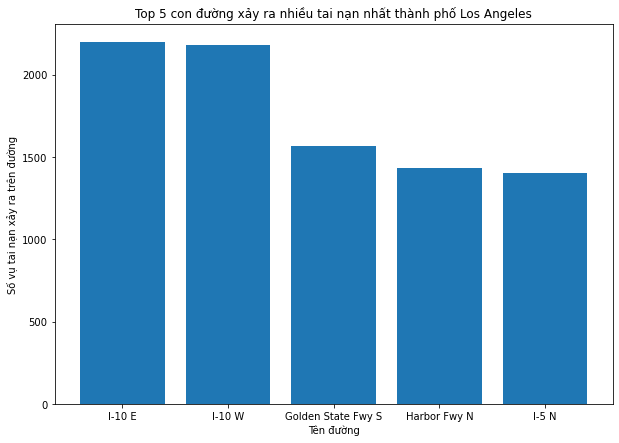

In [30]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(top_street['Street'], top_street['number_of_acc'])
plt.xlabel("Tên đường")  # add X-axis label
plt.ylabel("Số vụ tai nạn xảy ra trên đường")  # add Y-axis label
plt.title("Top 5 con đường xảy ra nhiều tai nạn nhất thành phố Los Angeles")  # add title
# Show Plot
plt.show()

- Nhìn chung số vụ tai nạn xảy ra ở top 5 những con đường xảy ra nhiều vụ tai nạn nhất thành phố Los Angeles có sự chênh lệch nhưng không quá lớn
- Nhiều nhất là hai con đường I-10 E và I-10 W với khoảng 2200 vụ
- Đường Golden State Fwy S có khoảng 1600 vụ
- Đường Harbor Fwy N và I-5N có khoảng 1500 vụ

In [31]:
country_df=accidents_df[accidents_df['City']==a_list[1]]
street_df=country_df.groupby(['City','County','Street']).size().reset_index(name='number_of_acc')
street_df=street_df.sort_values(by='number_of_acc', ascending=False).reset_index()
top_street=pd.DataFrame(street_df.loc[0:4])
print(top_street)


   index   City      County           Street  number_of_acc
0   1125  Miami  Miami-Dade           I-95 N           3267
1   1126  Miami  Miami-Dade           I-95 S           3210
2    652  Miami  Miami-Dade     SW 137th Ave           1118
3   1384  Miami  Miami-Dade  Palmetto Expy N           1041
4   1082  Miami  Miami-Dade   Dolphin Expy E           1020


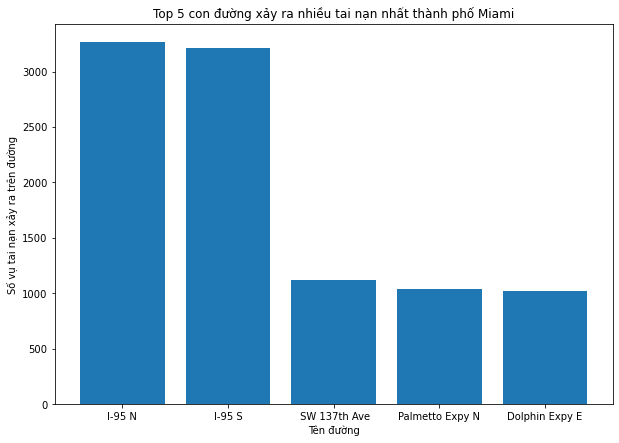

In [32]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(top_street['Street'], top_street['number_of_acc'])
plt.xlabel("Tên đường")  # add X-axis label
plt.ylabel("Số vụ tai nạn xảy ra trên đường")  # add Y-axis label
plt.title("Top 5 con đường xảy ra nhiều tai nạn nhất thành phố Miami")  # add title
# Show Plot
plt.show()

In [33]:
country_df=accidents_df[accidents_df['City']==a_list[2]]
street_df=country_df.groupby(['City','County','Street']).size().reset_index(name='number_of_acc')
street_df=street_df.sort_values(by='number_of_acc', ascending=False).reset_index()
top_street=pd.DataFrame(street_df.loc[0:4])
print(top_street)

   index       City       County       Street  number_of_acc
0   1127  Charlotte  Mecklenburg       I-77 N            853
1   1128  Charlotte  Mecklenburg       I-77 S            716
2    767  Charlotte  Mecklenburg   S Tryon St            520
3   1130  Charlotte  Mecklenburg       I-85 S            494
4   1129  Charlotte  Mecklenburg       I-85 N            423


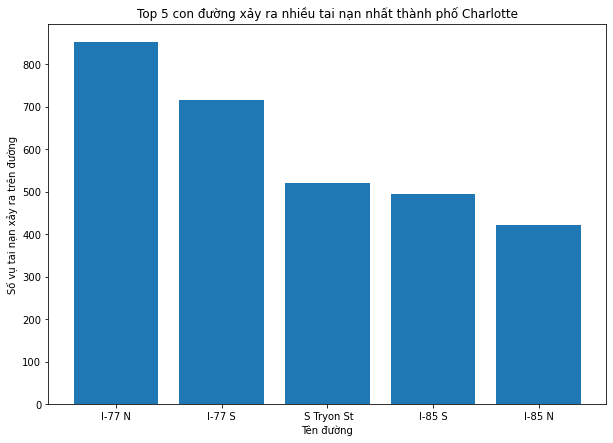

In [34]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(top_street['Street'], top_street['number_of_acc'])
plt.xlabel("Tên đường")  # add X-axis label
plt.ylabel("Số vụ tai nạn xảy ra trên đường")  # add Y-axis label
plt.title("Top 5 con đường xảy ra nhiều tai nạn nhất thành phố Charlotte")  # add title 
# Show Plot
plt.show()

### Nhận xét
- Như chúng ta có thể thấy thì tổng số vị trí bị tai nạn của các thành phố khá giống với top các thành phố có nhiều vụ tai nhất đứng nhất là Los Angeles tiếp theo lần lượt là : Miami,Dalas,Charlotte,Houston
- Nhìn chung thì không có gì thay đổi nhiều so với tổng số vụ tai nạn từ năm 2018-2020 ngoài trừ một vài sự thay đổi vị trí ở top 3,4,5 
- Từ đây ta có thể biết được tuy tổng số ca tai nạn của Charlotte và Houston hơn Dalas nhưng Dalas lại hơn số vị trí bị tai nạn của 2 thành phố này điều này chứng tỏ Charlotte và Houston có nhiều vụ tai nạn là ở cũng 1 vị trí, 1 con đường
- Ngoài ra ta có thể nhận ra được là đa phần vị trí của 5 thành phố có nhiều vụ tai nạn nhất qua 5 năm 2016-2020 đều có xu hướng gần biển , không biết điều này có ảnh hưởng gì tới thời tiết hay những yếu tố khác làm cho các thành phố này có nhiều vụ tai nạn hơn các thành phố khác hay không ? 
- Dựa vào biểu đồ này ta có thể dễ dàng biết được đoạn đường nào ở các thành phố có nhiều vụ tai nạn bằng cách zoom lên để từ đó đưa ra cách giải quyết như:
- đặt biển giao thông cảnh báo người lái xe đoạn đường này thường xảy ra tai nạn để người lái xe có cảnh giác trước
- Đặt biển giao thông giới hạn tốc độ chạy của người lái xe
- Cử thêm nhiều cảnh sát giao thông hơn ở những đoạn đường thường xảy ra tai nạn 
- Đặt thêm các đèn tín hiệu giao thông 
- Lập ra Chiến dịch tuyên truyền / quảng bá về an toàn đường bộ ở những đoạn đường dễ gây ra tai nạn ở mỗi thành phố thông qua các phương tiện điện tử và báo in.
- Kiểm tra và bảo vệ các cơ sở hạ tầng đường bộ biển báo,đèn đường, vạch kẻ đường, cọc tiêu, cột cây số, hành lang an toàn đường bộ hay hành lang an toàn bị lấn chiếm
- Cấp thêm nguồn tài chính và Thường xuyên bảo trì đường bộ ở những đoạn đường dễ gây ra tai nạn
- Giảm số lượng xe đi vào đoạn có nhiều tai nạn cũng 1 lúc 
- Kiểm tra các hệ thống thoát nước và điều chỉnh hệ thống thoát nước sao cho thích hợp ở những đoạn đường nguy hiểm
- Thêm gò giảm tốc ở con đường thường gây ra tai nạn

## Nhìn lại

### Mỗi thành viên gặp những khó khăn gì
- Khó khăn chung:
  + Chưa hiểu biết nhiều về github
  + Khó khăn trong việc tạo và hợp các nhánh lại
- Khó khăn của mỗi cá nhân:
  + Thành An: khó khăn trong việc sử dụng các thư viện để phân tích dữ liệu
  + Tâm Anh: chưa quen với cách xử lí một dữ liệu có dung lượng tương đối lớn
  + Thiện: Thời gian thi cử cộng kem với deadline của nhiều môn học dẫn đến việc chưa thể hoàn thành tốt được đồ án


### Những điều được hiểu biết thêm
   - Thành An:
     + Biết được cách tạo nhánh và hợp nhánh trên git hub
     + Đọc được nhiều tài liệu hiểu biết nhiều hơn về các vụ tai nạn giao thông
     + Nâng cao khả năng làm việc nhóm
   - Tâm Anh:
     + Có thêm kỹ năng về thống kê số liệu
     + Rèn luyện được tính kiên trì của bản thân để hoàn thành hết những deadline
     + Có những bước tiến đầu tiên vào ngành Khoa Học Dữ liệu
   - Thiện:
     + Biết sử dụng một số công cụ trực quan như plotly, matplotib, seaborn
     + Có thêm khả năng phân chia thời gian hợp lí khi khối lượng công việc và kiến thức tiếp thu ngày càng nhiều
     + Nâng cao khả năng đọc hiểu tiếng anh khi tìm hiểu về các tài liệu

In [35]:
pip install squarify

## Tài liệu tham khảo
 - https://www.kaggle.com/sobhanmoosavi/us-accidents
 - https://scholarworks.lib.csusb.edu/cgi/viewcontent.cgi?article=2085&context=etd
 - https://stackoverflow.com/
 - https://www.asirt.org/safe-travel/road-safety-facts/